# Bayes Networks

## Install required packages

In [26]:
#They take a while to install

#Uncomment if you are using colab
#!apt install libgraphviz-dev 

!pip3 install pomegranate --quiet
!pip3 install pygraphviz  --quiet
#!pip3 install pandas 
#!pip3 install matplotlib


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Sander\miniconda3\envs\AIPractical2\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Sander\\AppData\\Local\\Temp\\pip-install-dkdtrdwk\\pygraphviz\\setup.py'"'"'; __file__='"'"'C:\\Users\\Sander\\AppData\\Local\\Temp\\pip-install-dkdtrdwk\\pygraphviz\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Sander\AppData\Local\Temp\pip-wheel-xohgdolo'
       cwd: C:\Users\Sander\AppData\Local\Temp\pip-install-dkdtrdwk\pygraphviz\
  Complete output (55 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.7
  creating build\lib.win-amd64-3.7\pygraphviz
  copying pygraphviz\agraph.py -> build\lib.win-amd64-3.7\pygraphviz
  copying pygraphviz\graphviz.py -> build\lib.win-amd64-3.7\py

In [9]:
!pip3 install pandas 
!pip3 install matplotlib

## Libraries

In [1]:
from pomegranate import BayesianNetwork, DiscreteDistribution, Node, ConditionalProbabilityTable
from matplotlib.pyplot import figure
import pandas as pd
# Cosmetics
%config InlineBackend.figure_format ='retina'
pd.options.display.float_format = '{:,.3f}'.format
def print_df(array):
    print(pd.DataFrame(array).to_string(header=False,index = False))
    

## Helper Functions
We integrate the functionalities of the library with code below. 

In [2]:
#@title 

# Updates and plot the model and infers the conditional probability
def add_conditional_variable(variable_name,statistics,ordered_conditionals,
                             ordered_parents,distributions,nodes,model,plot=True):
    kopy = ordered_conditionals.copy()
    if variable_name not in distributions.keys():
        distribution = ConditionalProbabilityTable(
            explicit_probabilities(ordered_conditionals.copy()[variable_name]),
            [distributions[parent] for parent in ordered_parents[variable_name]]
            )
        distributions[variable_name] = distribution 
        node = Node(distribution, variable_name)
        nodes[variable_name] = node
        model.add_states(node)
        for parent in ordered_parents[variable_name]:
            model.add_edge(nodes[parent], node)   
    if plot:
        figure(dpi=160) 
        model.plot()
    model.bake()
    # Inferred probability of 'Y'
    inferred_probability = model.marginal()[-1].parameters[0]['Y']
    print(f'{variable_name}: \n\t Inferred probability = {inferred_probability:.3f}') 
    print( f'\t Statistic = {statistics[variable_name]}')
    assert kopy == ordered_conditionals

# Needed to explicitly state probabilities for Y and N
def explicit_probabilities(array):
    new_array = []
    for row in array:
        Y_row = row.copy()
        N_row = row.copy()
        Y_row.insert(-1, 'Y'),
        N_row.insert(-1, 'N'),
        N_row[-1] = 1 - row[-1]
        new_array.extend([Y_row,N_row])
    return new_array

# Helper function to increase readability
def print_predict_proba(model, nodes, obs_states, target=None):
    distrs = model.predict_proba([obs_states])[0]
    evidence = []
    uknown_distrs = []
    uknown_variables = []
    for name, state, distr in zip(nodes.keys(),obs_states,distrs):
        if state == 'Y':
            evidence.append(name)
        elif state == 'N':
            evidence.append('No_'+name)
        else:
            uknown_distrs.append(distr)
            uknown_variables.append(name)
    # We recapitulate the evidence and print the probabilities
    print(f'When C = {", ".join(evidence)}:')
    for name, distr in zip(uknown_variables,uknown_distrs):
        if not target or target == name:
            print(f'Prob({name}|C): {distr.parameters[0]["Y"]:.3f}')
    print()


## Inserting data from the medical report

In [3]:
# Fill in the following dictionary with the names of variables (keys) and their probabilities (values).
# Only two states per variable ('Y' and 'N'), shown probabilities for 'Y'.
# Variables with unknown statistic should be listed with value None
statistics = {'Weakened_immune': .053,
              'Smoking': .29,
               'Pneumonia': .018,
                'Lung cancer': .037,
                 'Bronchitis': 0.09,
                    'Common cold': .37,
                     'Fever': .085,
                        'Loose cough': .19,
                            'Chest pain': .14,
                                'Shortness of breath': .18,
                                    'Runny nose': None,
                                     'other': None}

# Update the following dictionary with the name of their dependecies to express the 
# Topology as a list of parent nodes
ordered_parents = {variable: [] for variable in statistics.keys()}
ordered_parents.update({'Shortness of breath': ['Bronchitis', 'Lung cancer', 'Pneumonia', 'other'], 'Chest pain': ['Lung cancer', 'Pneumonia', 'other'],
                        'Fever':['Pneumonia','Common cold', 'other'], 'Runny nose':['Common cold', 'other'], 'Loose cough':['Bronchitis','Pneumonia','other'] })

# Fill in the following CPT table with the states of the ordered parents ('N','Y', None if not known)
# corresponding to the event P(X='Y'|parents(X)). The probabilies P(X='N'|parents(X)) 
# will be automatically calculated later on.
ordered_conditionals = { 'Effect': [['Y', .8],
                                      ['N',.6]]}
ordered_conditionals = { 'Shortness of breath': [['Y', .8],['Y',.5],['Y', .5],['Y', .1]], 'Chest pain': [['Y', .9],['Y', .9],['Y', .10]],
                        'Loose cough': [['Y', .9],['Y', .9],['Y', .1]], 'Fever': [['Y', .94],['Y', .2], ['Y',.001]], 'Runny nose': [['Y', .95],['Y', .01]] } 

## Number of parameters

In [5]:
# Number of parameters required - complete CTP parameters
total_parameters = 0
for variable, parents in ordered_parents.items():
    # Write the correct formula to count the required parameters of a variable
    # TODO 
    total_parameters += 0
print(' Total number of parameters:', total_parameters)

 Total number of parameters: 0


## Draw the topology

In [4]:
# We sketch a dummy model only to see the graph
sketch_model = BayesianNetwork("Medical Report - sketch")

# Topology expressed with edges 
edges = []
for variable_name, parents in ordered_parents.items():
    for parent in parents:
        edge = [parent, variable_name]
        edges.append(edge)
        
# Dummy variables
nodes = {}
for variable_name in statistics.keys():
    distribution = DiscreteDistribution({'Y': .5, 'N': .5})
    node = Node(distribution, name=variable_name)
    nodes[variable_name] = node
    
# Add States    
sketch_model.add_states(*nodes.values())

# Add Edges
for edge in edges:
    sketch_model.add_edge(nodes[edge[0]], nodes[edge[1]])
    
# Plot
figure(dpi=160)
sketch_model.plot()

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Sander\\AppData\\Local\\Temp\\tmpkk6fe55x'

<Figure size 960x640 with 0 Axes>

## Belief propagation

In [7]:
# Let us initialize the real model
model = BayesianNetwork("Medical Report")

# Topology expressed as list of children
ordered_children = {variable: [] for variable in statistics.keys()}
for edge in edges:
    ordered_children[edge[0]].append(edge[1])

# Independent variables and leaves
independent_variables = [variable for variable, parents in ordered_parents.items() if not parents]
leaves = [variable for variable, children in ordered_children.items() if not children]

# Write a function that lists the variables in stages so that the dependencies of a variable 
# are always coming from a previous stage  
def propagate_net(independent_variables,leaves,ordered_parents):
    belief_propagation = [['Cause'], ['Effect']]
    return belief_propagation

# Check the previous graph to see how at every stage, all the parents are already known
belief_propagation = propagate_net(independent_variables,leaves,ordered_parents)
for stage, variables in enumerate(belief_propagation):
    print(f' {stage+1}) {", ".join(variables)}')

 1) Cause
 2) Effect


## Independent variables

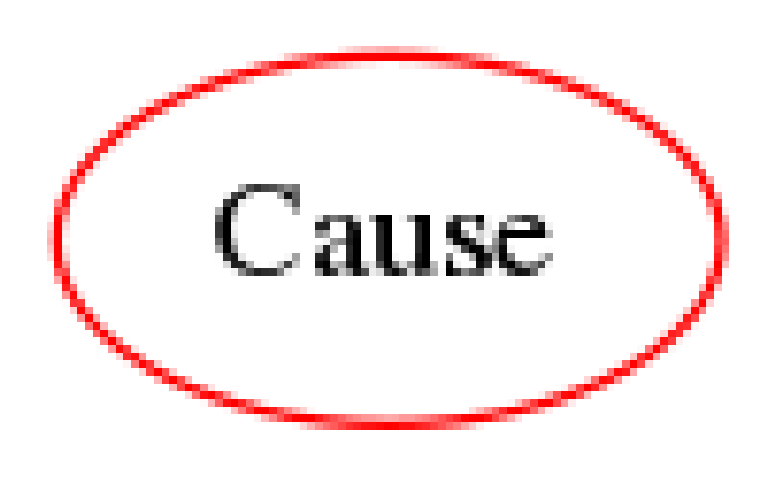

In [8]:
# We add variables following the order above
distributions = {}
nodes = {}
for variable_name in independent_variables:
    probability = statistics[variable_name]
    distribution = DiscreteDistribution({'Y': probability, 'N': 1 - probability})
    node = Node(distribution, name=variable_name)
    distributions[variable_name] = distribution
    nodes[variable_name] = node
    
model.add_states(*nodes.values())
figure(dpi=80)
model.plot()

args = [statistics,ordered_conditionals,ordered_parents,distributions,nodes,model]

## Infer the conditional probabilities

Effect: 
	 Inferred probability = 0.700
	 Statistic = 0.7


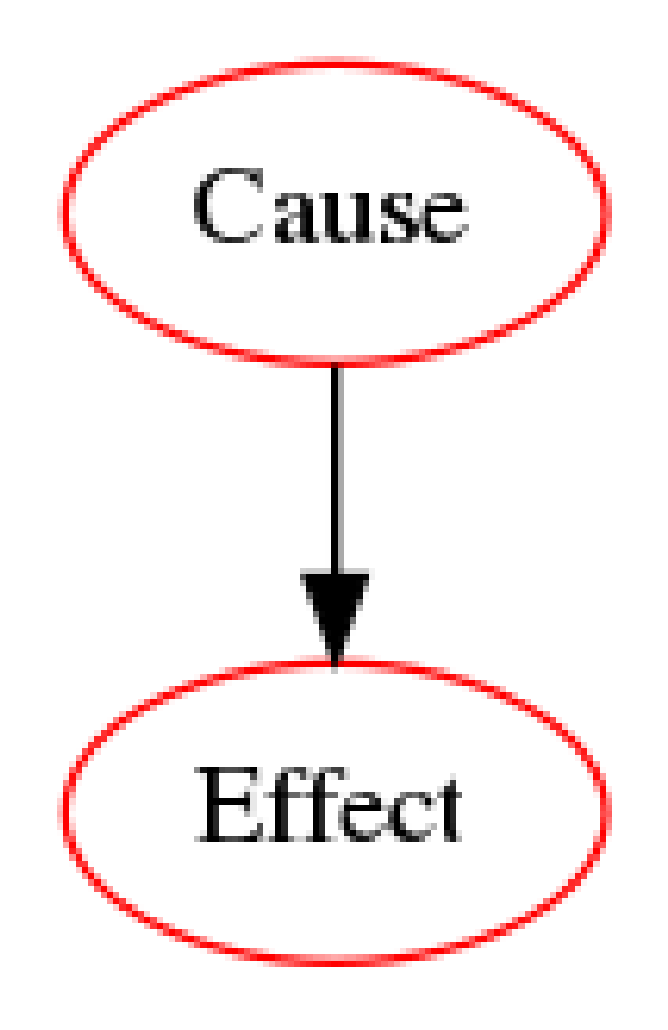

In [9]:
# We add the variable to the model and check that the statistics are consistent
add_conditional_variable('Effect',*args,plot=True)

# If you are using colab you can use tabs to add sequentially more variables 

# from google.colab import widgets
# tab_variables = ['example2']
# tb = widgets.TabBar([str(i) for i in range(len(tab_variables))])
# for i, variable_name in enumerate(tab_variables):
#   with tb.output_to(i, select=(i < 1)):
#     add_conditional_variable(variable_name,*args)


In [10]:
# To make the code more readable you can name the indices of the variables
node_list = list(nodes.keys())
Cause_index = node_list.index('Cause')
Effect_index = node_list.index('Effect')


## Cause -> Effect
P(Cause = 'Y'| Effect = 'Y')


In [11]:
# We create a vector of known and unknown states 
obs_states = [None]*len(node_list)
obs_states[Cause_index] = 'Y'

# We calculate the inferenced probabilities 
# (None target lists the probabilities of all the non observed variable)
print_predict_proba(model, nodes, obs_states, target='Effect')   

When C = Cause:
Prob(Effect|C): 0.800

